In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
d=pd.read_csv('C:\\Users\\Admin\\Desktop\\data analyst\\datasets\\bank-full.csv',sep=';')

In [3]:
d.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
d.shape

(45211, 17)

In [5]:
d.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
d.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
d['conversion'] = d['y'].apply(lambda x: 0 if x == 'no' else 1)

In [8]:
conversion_rate_df = pd.DataFrame(
d.groupby('conversion').count()['y'] / d.shape[0] * 100.0
)

In [9]:
conversion_rate_df

,y
conversion,
0,88.30152
1,11.69848


In [10]:
conversion_rate_df.T

conversion,0,1
y,88.30152,11.69848


In [11]:
conversion_rate_by_job = d.groupby(
by='job'
)['conversion'].sum() / d.groupby(
by='job'
)['conversion'].count() * 100.0

In [12]:
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

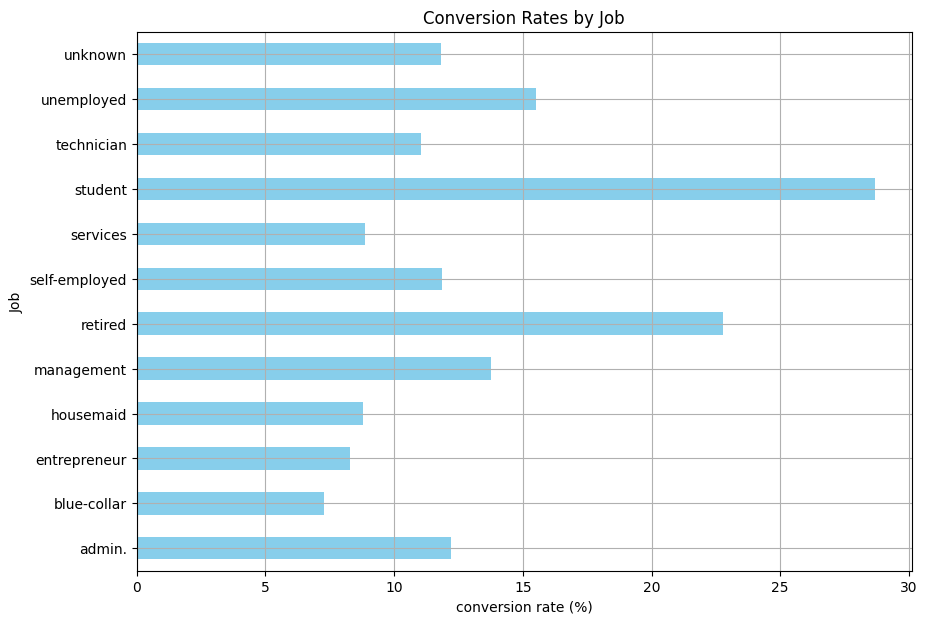

In [13]:
ax = conversion_rate_by_job.plot(
kind='barh',
color='skyblue',
grid=True,
figsize=(10, 7),
title='Conversion Rates by Job'
)
ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')
plt.show()

In [14]:
default_by_conversion_df = pd.pivot_table(
d,
values='y',
index='default',
columns='conversion',
aggfunc=len
)

In [15]:
default_by_conversion_df

conversion,0,1
default,,
no,39159,5237
yes,763,52


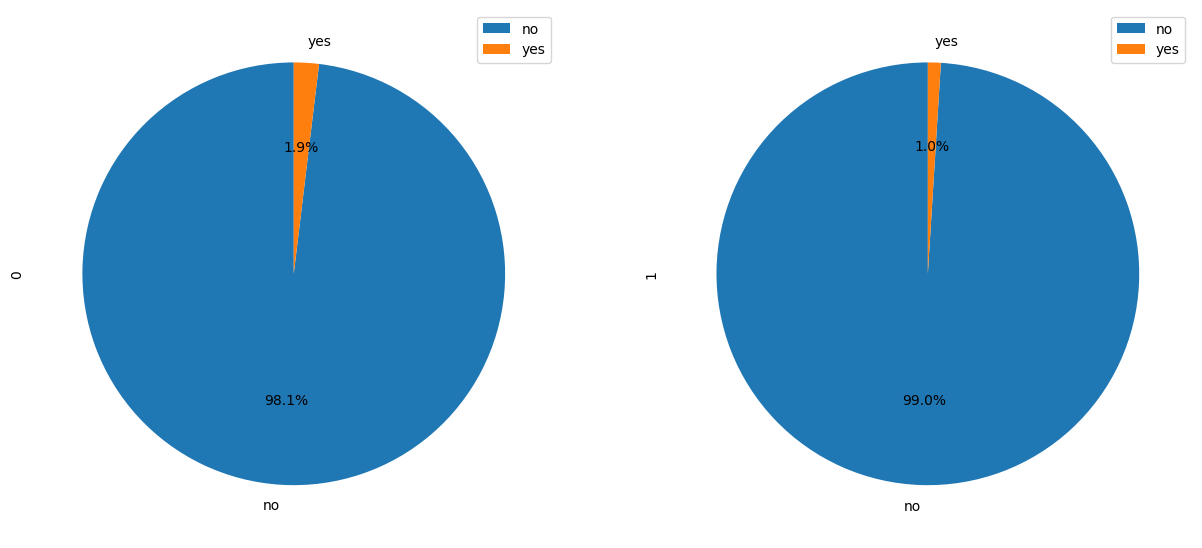

In [16]:
default_by_conversion_df.plot(
kind='pie',
figsize=(15, 7),
startangle=90,
subplots=True,
autopct=lambda x: '%0.1f%%' % x
)
plt.show()

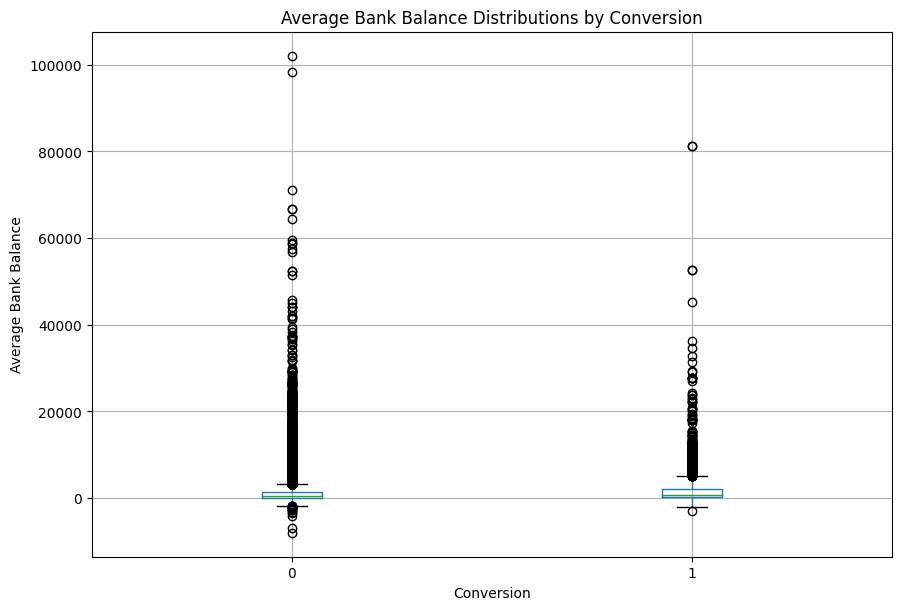

In [17]:
ax = d[['conversion', 'balance']].boxplot(
by='conversion',
showfliers=True,
figsize=(10, 7)
)
ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle("")
plt.show()

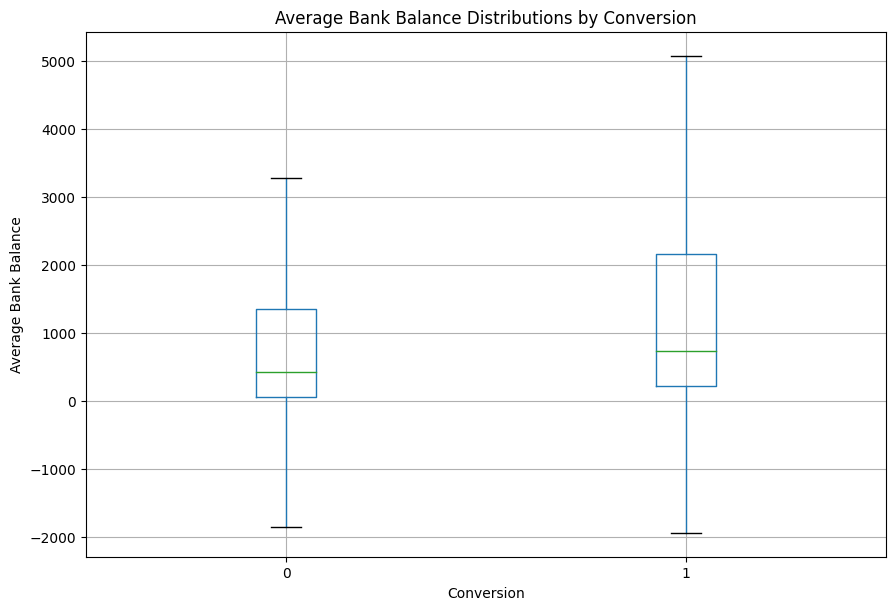

In [18]:
ax = d[['conversion', 'balance']].boxplot(
by='conversion',
showfliers=False,
figsize=(10, 7)
)
ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle("")
plt.show()

In [19]:
conversions_by_num_contacts = d.groupby(
by='campaign'
)['conversion'].sum() / d.groupby(
by='campaign'
)['conversion'].count() * 100.0

In [20]:
pd.DataFrame(conversions_by_num_contacts)

,conversion
campaign,
1,14.597583
2,11.203519
3,11.193624
4,9.000568
5,7.879819
6,7.126259
7,6.394558
8,5.925926
9,6.422018


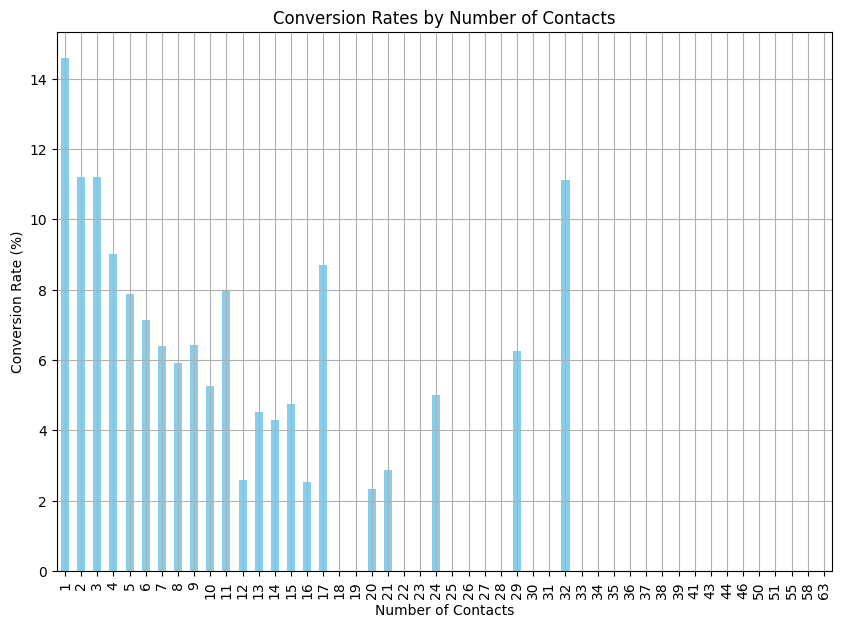

In [21]:
ax = conversions_by_num_contacts.plot(
kind='bar',
figsize=(10, 7),
title='Conversion Rates by Number of Contacts',
grid=True,
color='skyblue'
)
ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')
plt.show()

In [22]:
d['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [23]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
'nov', 'dec']
d['month'] = d['month'].apply(
lambda x: months.index(x)+1
)


In [24]:
d.groupby('month').count()['conversion']

month
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: conversion, dtype: int64

In [25]:
d['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [26]:
jobs_encoded_df = pd.get_dummies(d['job'])
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns]

In [27]:
d = pd.concat([d, jobs_encoded_df], axis=1)
d.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,False,False,True,False,False,False,False,False,False,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,False,False,False,False,False,False,False,True,False,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,True,False,False,False,False,False,False,False,False,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,False,False,False,False,False,False,False,False,False,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,False,False,False,False,False,False,False,False,False,True


In [48]:
marital_encoded_df = pd.get_dummies(d['marital'])
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]

In [49]:
marital_encoded_df

,marital_divorced,marital_married,marital_single
0,False,True,False
1,False,False,True
2,False,True,False
3,False,True,False
4,False,False,True
...,...,...,...
45206,False,True,False
45207,True,False,False
45208,False,True,False
45209,False,True,False


In [50]:
df = pd.concat([d, marital_encoded_df], axis=1)

In [51]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,False,False,False,False,False,False,False,False,True,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,False,False,False,False,True,False,False,False,False,True
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,False,False,False,False,False,False,False,False,True,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,False,False,False,False,False,False,False,False,True,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,False,False,False,False,True,False,False,False,True,False
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,True,False,False,False,False,False,False,True,False,False
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,True,False,False,False,False,False,False,False,True,False
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,False,False,False,False,False,False,False,False,True,False


In [52]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [53]:
from sklearn import tree

In [54]:
dt_model = tree.DecisionTreeClassifier(
max_depth=4
)

In [55]:
d.values[0:,0:8]

array([[58, 'management', 'married', ..., 2143, 'yes', 'no'],
       [44, 'technician', 'single', ..., 29, 'yes', 'no'],
       [33, 'entrepreneur', 'married', ..., 2, 'yes', 'yes'],
       ...,
       [72, 'retired', 'married', ..., 5715, 'no', 'no'],
       [57, 'blue-collar', 'married', ..., 668, 'no', 'no'],
       [37, 'entrepreneur', 'married', ..., 2971, 'no', 'no']],
      dtype=object)

In [56]:
features = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing',
] + list(jobs_encoded_df.columns) + list(marital_encoded_df.columns)

response_var = 'conversion'


In [57]:
y=d['conversion']

In [59]:
dt_model.fit(df[features],df[response_var])

DecisionTreeClassifier(max_depth=4)

In [60]:
import graphviz

In [61]:
z=x.columns

In [62]:
dot_data = tree.export_graphviz(
dt_model,
feature_names=features,
class_names=['0', '1'],
filled=True,
rounded=True,
special_characters=True
)


In [63]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=<previous &le; 0.5<br/>gini = 0.207<br/>samples = 45211<br/>value = [39922, 5289]<br/>class = 0>, fillcolor="#e89253"] ;\n1 [label=<age &le; 60.5<br/>gini = 0.166<br/>samples = 36954<br/>value = [33570, 3384]<br/>class = 0>, fillcolor="#e88e4d"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<housing &le; 0.5<br/>gini = 0.157<br/>samples = 36202<br/>value = [33102, 3100]<br/>class = 0>, fillcolor="#e78d4c"] ;\n1 -> 2 ;\n3 [label=<age &le; 29.5<br/>gini = 0.2<br/>samples = 16263<br/>value = [14427, 1836]<br/>class = 0>, fillcolor="#e89152"] ;\n2 -> 3 ;\n4 [label=<gini = 0.357<br/>samples = 1751<br/>value = [1343, 408]<br/>class = 0>, fillcolor="#eda775"] ;\n3 -> 4 ;\n5 [label=<gini = 0.177<br/>samples = 14512<br/>value = [13084, 1428]<br/>class = 0>, fillcolor="#e88f4f"] ;\n3 -> 5 ;\n6 [label=<marital_married &le; 0.5<br/>

In [64]:
graph = graphviz.Source(dot_data)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH